# Qwen/Qwen2-VL-7B-Instruct plans critic

In [1]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
import torch
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

from PIL import Image

from src.misc import generate_response

OMP: Warning #234: OMP_NUM_THREADS: Invalid symbols found. Check the value "".


In [2]:
torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.current_device()
torch.cuda.get_device_name(0)

'NVIDIA A100-SXM4-80GB'

In [3]:
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct", 
    torch_dtype="auto", 
    device_map="auto",
)

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
# print(model)

In [4]:
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-VL-7B-Instruct", use_fast=False, trust_remote_code=True)
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-7B-Instruct", trust_remote_code=True)

In [5]:
if "<image>" not in tokenizer.get_vocab():
    tokenizer.add_special_tokens({"additional_special_tokens": ["<image>"]})
    model.resize_token_embeddings(len(tokenizer))

## 1. House plan

The goal of this experiment is to check the VLM's performance acting as a critic over the architectural plans. This includes correct describing given drawings as well as meaningful proposals of the plan improvements. 

In [6]:
# Plan of a russian single-storey house
image = Image.open("../data/Plan_1_1084x700.jpg")

Construct a prompt to guide the model to act as a VLM critic.

The prompt strategy is:
1. Ask the model to analyze the provided architectural plan image.
2. Instruct it to evaluate the design based on architectural standards, ergonomics, and compliance.
3. Request specific improvement suggestions.

In [7]:
prompt = (
    "You are a professional architect and building standards expert solving the task as a critic of the provided solution. "
    "You are given an architectural floor plan: <image>. "
    "Describe the plan and most importantly find and list all the windows an doors and remember this information. "
    "Evaluate the quality of this particular plan. "
    "Assess if the given particular plan meets architectural standards and ergonomic principles, "
    "and suggest improvements to enhance the usability, compliance, and design clarity of the given plan. "
    "Give specific improvement suggestions in a form of concrete and measurable steps with the references to specific national and international standards."
)

In [8]:
output_text = generate_response(model, processor, prompt, image)

In [9]:
display(Markdown(output_text[0]))

The provided architectural floor plan is a two-story residential layout. Here is a detailed description of the plan, including the windows and doors, and an assessment of its quality based on architectural standards and ergonomic principles.

### Description of the Plan

#### Ground Floor
- **Entrance:** The main entrance is located at the bottom center of the plan, leading to a small foyer (Tambr) of 2.48 square meters.
- **Living Room:** The living room is situated on the left side, measuring 17.63 square meters. It has a large window on the left side.
- **Kitchen:** The kitchen is adjacent to the living room, measuring 10.24 square meters. It has a window on the right side.
- **Dining Area:** The dining area is located within the living room, sharing the same space.
- **Bathroom:** The bathroom is located near the kitchen, measuring 3.85 square meters. It has a window.
- **Bedrooms:** There are two bedrooms on the right side of the plan:
  - The first bedroom is 9.28 square meters and has a window.
  - The second bedroom is 11.70 square meters and has a window.
- **Hallway:** The hallway connects the living room, kitchen, and bedrooms, measuring 7.86 square meters.

#### First Floor
- **Bedroom:** The third bedroom is located on the first floor, measuring 13.20 square meters. It has a window.
- **Boiler Room:** The boiler room is located near the entrance, measuring 3.19 square meters. It has a window.

### Windows and Doors
- **Ground Floor:**
  - Living Room: 1 window
  - Kitchen: 1 window
  - Dining Area: 1 window
  - Bathroom: 1 window
  - Hallway: 1 window
  - Bedroom 1: 1 window
  - Bedroom 2: 1 window
  - Bedroom 3: 1 window
  - Boiler Room: 1 window
- **First Floor:**
  - Bedroom 3: 1 window

### Assessment and Suggestions

#### Architectural Standards and Ergonomic Principles
1. **Lighting:** The plan has a good distribution of windows, which ensures natural light in most rooms. However, the bathroom on the ground floor lacks natural light, which could be improved by adding a window or a skylight.
2. **Ventilation:** The plan has adequate ventilation with windows in most rooms. However, the bathroom on the ground floor lacks proper ventilation, which could be improved by adding an exhaust fan.
3. **Accessibility:** The plan is accessible, with a main entrance and a hallway that connects all rooms. However, the small foyer (Tambr) could be improved for better accessibility.
4. **Privacy:** The bedrooms are well-separated from the living areas, providing privacy. However, the bathroom on the ground floor is adjacent to the living room, which could be improved by relocating it to a more private area.

#### Improvement Suggestions
1. **Bathroom on the Ground Floor:** Move the bathroom to a more private area, such as the hallway or near the bedrooms, to improve privacy.
2. **Ventilation in the Bathroom:** Add an exhaust fan to the bathroom on the ground floor to improve ventilation.
3. **Foyer (Tambr) Improvement:** Increase the size of the foyer to improve accessibility and provide a more welcoming entrance.
4. **Lighting in the Bathroom:** Add a window to the bathroom on the ground floor to improve natural light.
5. **Additional Windows:** Consider adding windows to the hallway to improve natural light and ventilation.

### Conclusion
The provided floor plan meets basic architectural standards and ergonomic principles. However, there are minor improvements that can be made to enhance the usability, compliance, and design clarity of the plan. The suggestions above provide concrete and measurable steps to address these improvements.

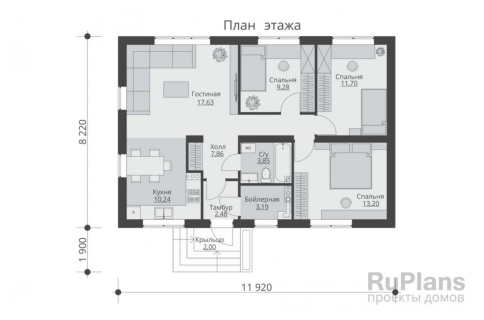

In [22]:
# Plan of a russian single-storey house
plt.figure(figsize=(6, 4))
plt.imshow(image)
plt.axis('off')
plt.show()

In [11]:
# Plan of a swedish single-storey house
image_2 = Image.open("../data/Plan_2_1920x1440.jpg")

In [12]:
output_text = generate_response(model, processor, prompt, image_2)

In [13]:
display(Markdown(output_text[0]))

### Description of the Plan

The provided architectural floor plan is for a two-story residential building. Here is a detailed description of the plan:

#### First Floor:
- **Sovrum 1 (Bedroom 1)**: 15.4 m²
- **Allrum (Living Room)**: 25.9 m²
- **Bad (Bathroom)**: 8.3 m²
- **G/L (Ground Level)**: Indicates the entrance level.
- **Sovrum 2 (Bedroom 2)**: 10.4 m²
- **Sovrum 3 (Bedroom 3)**: 9.7 m²
- **Balkong (Balcony)**: Accessible from the Allrum.

#### Second Floor:
- **Allrum (Living Room)**: 25.9 m²
- **Sovrum 1 (Bedroom 1)**: 15.4 m²
- **Sovrum 2 (Bedroom 2)**: 10.4 m²
- **Sovrum 3 (Bedroom 3)**: 9.7 m²
- **Bad (Bathroom)**: 8.3 m²
- **G/L (Ground Level)**: Indicates the entrance level.

### Windows and Doors:
- **First Floor**:
  - **Allrum (Living Room)**: 1 window
  - **Sovrum 1 (Bedroom 1)**: 1 window
  - **Sovrum 2 (Bedroom 2)**: 1 window
  - **Sovrum 3 (Bedroom 3)**: 1 window
  - **Bad (Bathroom)**: 1 window
  - **Balkong (Balcony)**: 1 door
- **Second Floor**:
  - **Allrum (Living Room)**: 1 window
  - **Sovrum 1 (Bedroom 1)**: 1 window
  - **Sovrum 2 (Bedroom 2)**: 1 window
  - **Sovrum 3 (Bedroom 3)**: 1 window
  - **Bad (Bathroom)**: 1 window
  - **G/L (Ground Level)**: 1 door

### Evaluation and Suggestions

#### Architectural Standards and Ergonomic Principles:
1. **Lighting and Ventilation**:
   - The plan provides adequate natural light through multiple windows, which is a positive aspect. However, the distribution of windows could be improved to ensure even lighting across all rooms.
   - The presence of a balcony in the Allrum is a good feature for outdoor access and natural ventilation.

2. **Accessibility**:
   - The plan includes a ground-level entrance, which is a positive aspect for accessibility.
   - The layout appears to be straightforward, with clear paths from one room to another.

3. **Privacy and Security**:
   - The bedrooms are well-separated from the living areas, providing privacy.
   - The presence of multiple windows in the bedrooms could be a concern for privacy, depending on the location and context.

#### Improvements:
1. **Lighting and Ventilation**:
   - Consider adding more windows in the bedrooms to improve natural lighting and ventilation.
   - Ensure that the windows in the living areas are large enough to provide adequate natural light and ventilation.

2. **Accessibility**:
   - Ensure that the ground-level entrance is easily accessible for people with disabilities.
   - Consider adding a ramp or a wheelchair-accessible path to the balcony.

3. **Privacy and Security**:
   - Install privacy curtains or blinds in the bedrooms to enhance privacy.
   - Consider adding security features such as deadbolts and peepholes.

4. **Design Clarity**:
   - Use different line weights or colors to distinguish between different types of walls and partitions.
   - Clearly label all rooms and areas to improve design clarity.

### Conclusion
The provided floor plan meets basic architectural standards and ergonomic principles. However, there are opportunities to enhance the plan by improving lighting and ventilation, ensuring accessibility, and enhancing privacy and security. The suggestions provided can help improve the usability, compliance, and design clarity of the given plan.

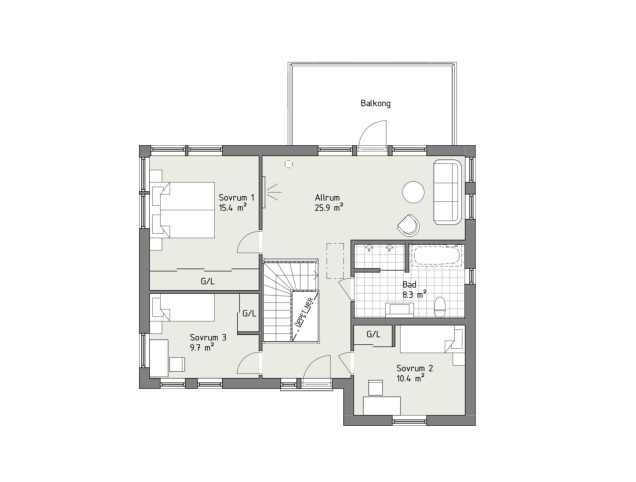

In [16]:
plt.figure(figsize=(10, 6))
plt.imshow(image_2)
plt.axis('off')
plt.show()

Same but now in prompt add the descripion of the plan.

In [18]:
prompt_2 = (
    "You are a professional architect and building standards expert solving the task as a critic of the provided solution. "
    "You are given an architectural floor of a second floor of a two-storey house in sweden. G/L means a wardrobe.: <image>. "
    "Describe the plan and most importantly find and list all the windows an doors and remember this information. "
    "Evaluate the quality of this particular plan. "
    "Assess if the given particular plan meets architectural standards and ergonomic principles, "
    "and suggest improvements to enhance the usability, compliance, and design clarity of the given plan. "
    "Give specific improvement suggestions in a form of concrete and measurable steps with the references to specific national and international standards."
)

In [19]:
output_text = generate_response(model, processor, prompt_2, image)
display(Markdown(output_text[0]))

The provided architectural floor plan of the second floor of a two-storey house in Sweden is well-organized and follows some basic architectural and ergonomic principles. However, there are a few areas that could be improved to enhance usability, compliance, and design clarity. Here is a detailed analysis and improvement suggestions:

### Analysis:

1. **Windows and Doors:**
   - **Sovrum 1 (Bedroom 1):** One window.
   - **Allrum (Living Room):** One window.
   - **Sovrum 2 (Bedroom 2):** One window.
   - **Sovrum 3 (Bedroom 3):** One window.
   - **Bad (Bathroom):** One window.
   - **G/L (Wardrobe):** One door.
   - **Balkong (Balcony):** One door.

2. **General Layout:**
   - The layout is compact and efficient, with bedrooms and a bathroom on one side and a living room on the other.
   - The balcony is accessible from the living room, providing an outdoor space.
   - The staircase is centrally located, providing easy access to both floors.

3. **Architectural Standards and Ergonomic Principles:**
   - The plan follows basic architectural standards, such as providing a clear separation of spaces (bedrooms, living room, bathroom).
   - The layout is functional, with bedrooms and bathrooms on one side and a living room on the other.
   - The balcony provides an outdoor space, which is a common ergonomic principle for improving mental well-being.

### Improvement Suggestions:

1. **Window Placement:**
   - **Sovrum 1 (Bedroom 1):** Consider adding a second window to improve natural light and ventilation.
   - **Sovrum 2 (Bedroom 2):** Similarly, adding a second window would enhance the room's usability.
   - **Sovrum 3 (Bedroom 3):** Adding a second window would improve the room's ventilation and natural light.
   - **Bad (Bathroom):** Consider adding a window to improve ventilation and reduce moisture buildup.

2. **Balcony Access:**
   - The balcony is currently accessible only from the living room. Consider adding a door from the bedroom to the balcony to provide more flexibility in using the space.

3. **Staircase Design:**
   - Ensure that the staircase meets the minimum width and height requirements as per local building codes. The staircase should be wide enough to accommodate a standard width of 1.2 meters and have a height of 18-20 inches (457-508 mm) between steps.

4. **Wardrobe Placement:**
   - The wardrobe (G/L) is centrally located, which might not be ideal for all users. Consider placing it closer to the bedrooms to provide more convenient access.

5. **Additional Storage:**
   - Consider adding additional storage spaces, such as built-in shelves or cabinets, to maximize the use of available space.

6. **Lighting:**
   - Ensure that the lighting fixtures are placed to provide adequate illumination in all areas, especially in the living room and bedrooms.

7. **Accessibility:**
   - Ensure that the plan meets accessibility standards, such as providing a clear path of travel and ensuring that all doors and windows are easily accessible.

### Conclusion:

The provided floor plan is well-organized and follows basic architectural and ergonomic principles. However, there are a few areas that could be improved to enhance usability, compliance, and design clarity. By implementing the suggested improvements, the plan can better meet architectural standards and ergonomic principles, resulting in a more functional and comfortable living space.